In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import torch
# from omegaconf import OmegaConf

In [17]:
modelBest = np.load("/home/jtoledo/JetData.npz")
model513 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250813_233227-z4hoj71e/files/JetData.npz")
model535 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250819_203111-u88m8d6w/files/JetData.npz")
model542 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250821_230537-pp65hpwu/files/JetData.npz")
model447 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250825_185123-cysb33l7/files/JetData.npz")
model550 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250825_231749-qtzezvdq/files/JetData.npz")

models = {
    "best": modelBest,
    "513": model513,
    "535": model535,
    "542": model542,
    "447": model447,
    "550": model550
}


In [19]:
model_colors

{'best': (0.4, 0.7607843137254902, 0.6470588235294118, 1.0),
 '513': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0),
 '535': (0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0),
 '542': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 1.0),
 '447': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0),
 '550': (1.0, 0.8509803921568627, 0.1843137254901961, 1.0)}

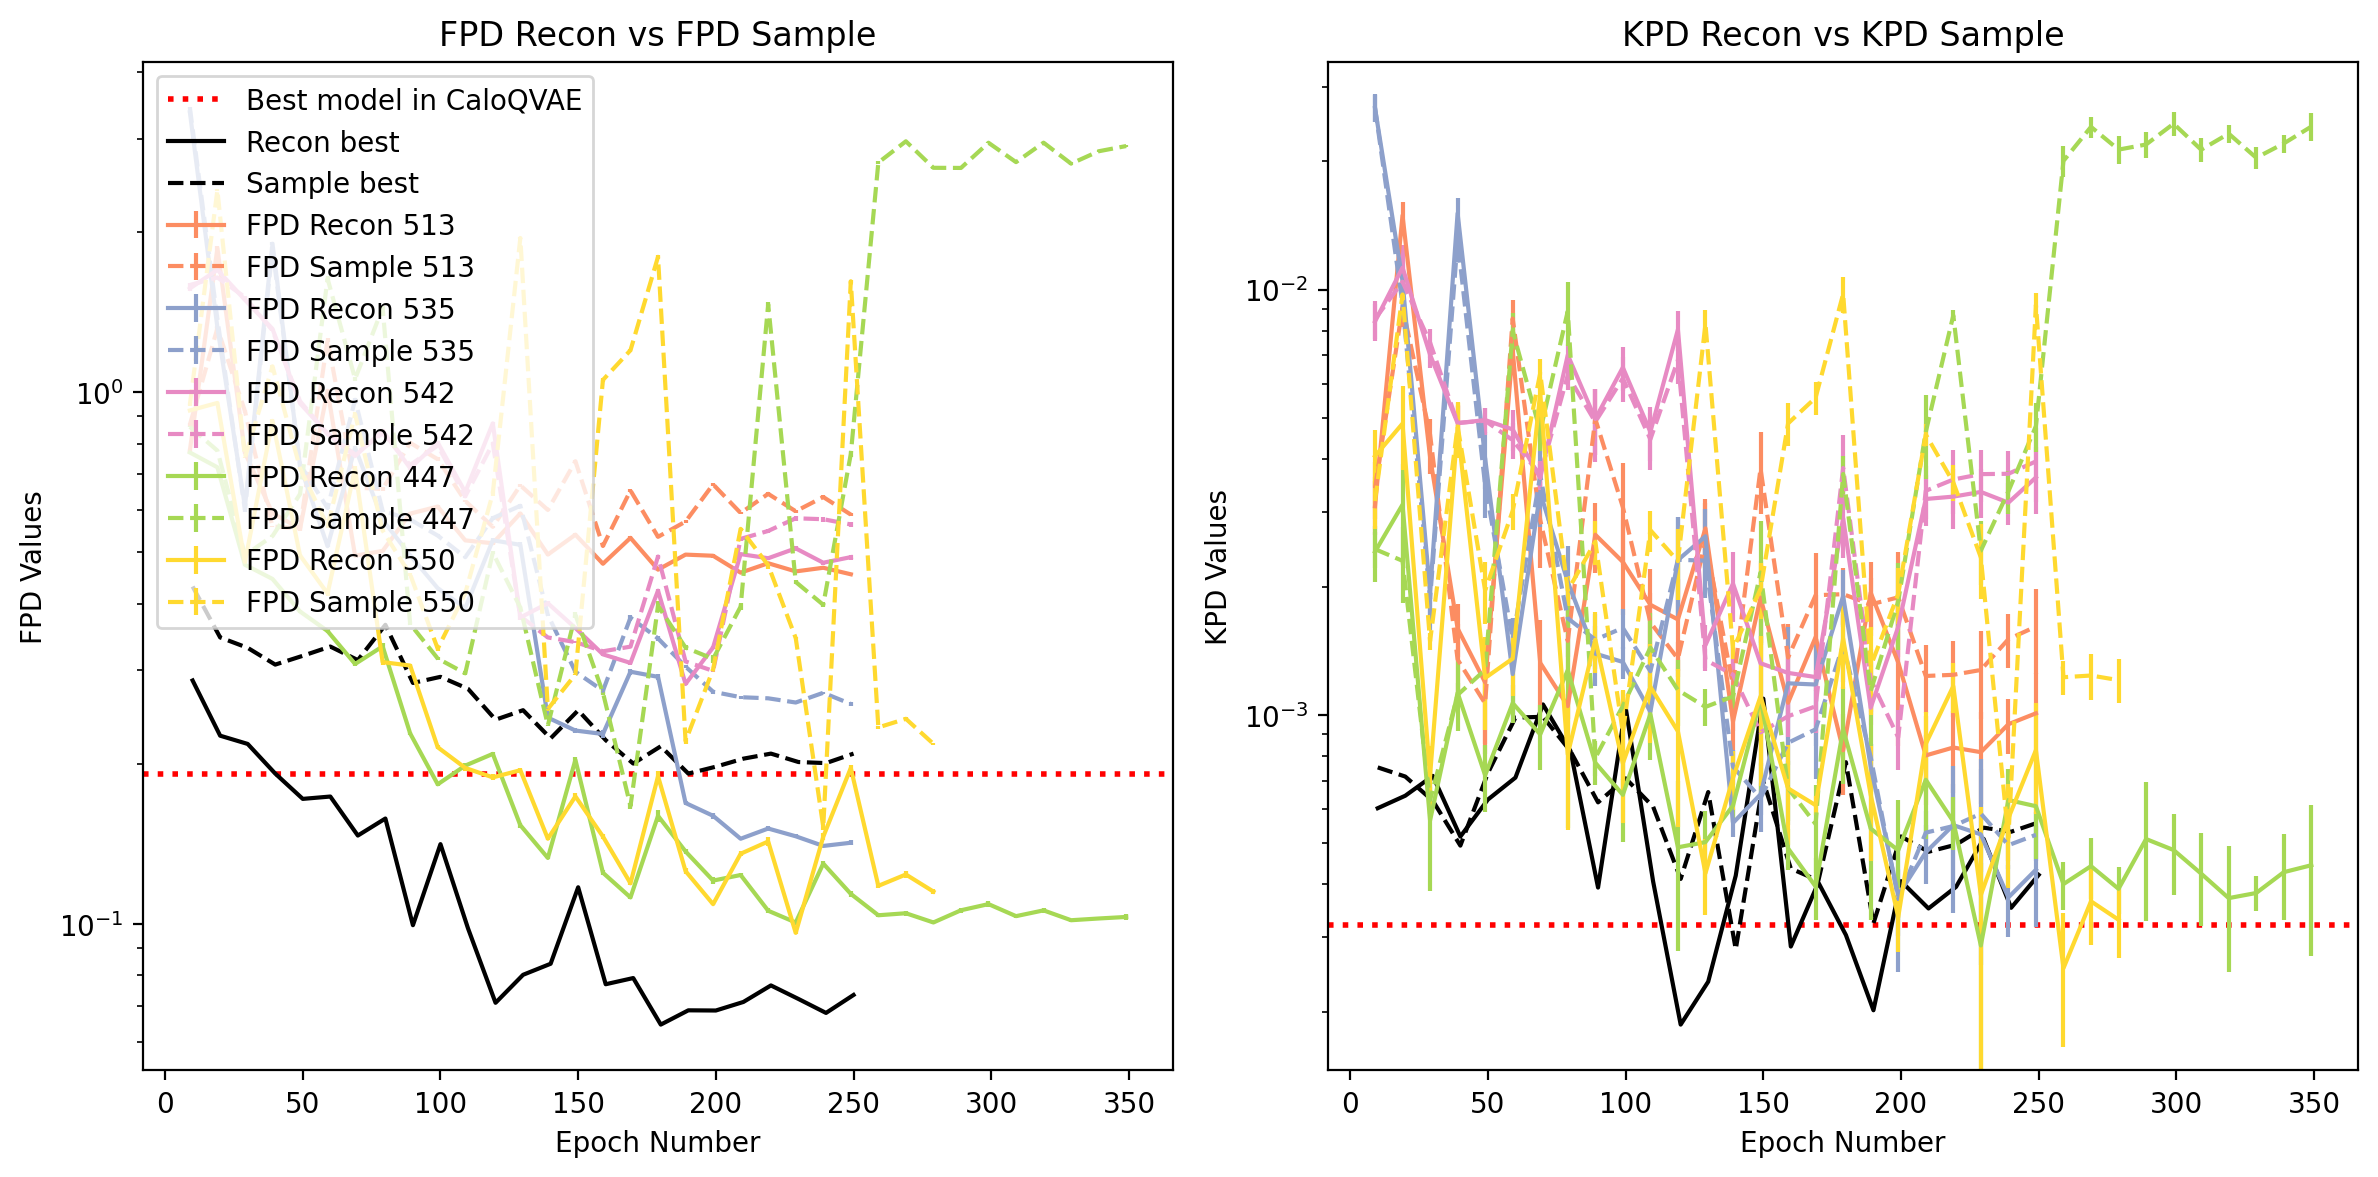

In [18]:
# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.axhline(0.191, color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')
ax2.axhline(0.00032, color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')
for name, model in models.items():
    color = model_colors[name]
    if name != 'best':
        en_list = model['array1']
        fpd_recon = model['array2']
        fpd_recon_err = model['array3']
        kpd_recon = model['array4']
        kpd_recon_err = model['array5']
        fpd_sample = model['array6']
        fpd_sample_err = model['array7']
        kpd_sample = model['array8']
        kpd_sample_err = model['array9']
        # Plot fpd_recon and fpd_sample on ax1
        ax1.errorbar(en_list, fpd_recon, yerr=fpd_recon_err, label=f'FPD Recon {name}', color=color)
        ax1.errorbar(en_list, fpd_sample, yerr=fpd_sample_err, label=f'FPD Sample {name}', linestyle='--', color=color)
        ax1.set_xlabel('Epoch Number')
        ax1.set_ylabel('FPD Values')
        ax1.set_title('FPD Recon vs FPD Sample')
        ax1.set_yscale('log')

        # Plot kpd_recon and kpd_sample on ax2
        ax2.errorbar(en_list, kpd_recon, yerr=kpd_recon_err, label=f'KPD Recon {name}', color=color)
        ax2.errorbar(en_list, kpd_sample, yerr=kpd_sample_err, label=f'KPD Sample {name}', linestyle='--', color=color)
        ax2.set_xlabel('Epoch Number')
        ax2.set_ylabel('KPD Values')
        ax2.set_title('KPD Recon vs KPD Sample')
        
    else:
        en_list = model['array1']
        fpd_recon = model['array2']
        # fpd_recon_err = model['array3']
        kpd_recon = model['array3']
        # kpd_recon_err = model['array5']
        fpd_sample = model['array4']
        # fpd_sample_err = model['array7']
        kpd_sample = model['array5']
        # kpd_sample_err = model['array9']
        ax1.plot(en_list, fpd_recon, label=f'Recon {name}', color='black')
        ax1.plot(en_list, fpd_sample, label=f'Sample {name}', linestyle='--', color='black')
        ax2.plot(en_list, kpd_recon, label=f'Recon {name}', color='black')
        ax2.plot(en_list, kpd_sample, label=f'Sample {name}', linestyle='--', color='black')

    ax1.legend(loc='upper left')
    # ax2.legend(loc='upper left')
    ax1.set_yscale('log')
    ax2.set_yscale('log')

    

plt.tight_layout()

Error plotting sparsity_layer for model513: float() argument must be a string or a real number, not 'dict'
Error plotting sparsity_layer for model535: float() argument must be a string or a real number, not 'dict'
Error plotting sparsity_layer for model542: float() argument must be a string or a real number, not 'dict'
Error plotting sparsity_layer for model447: float() argument must be a string or a real number, not 'dict'
Error plotting sparsity_layer for model550: float() argument must be a string or a real number, not 'dict'


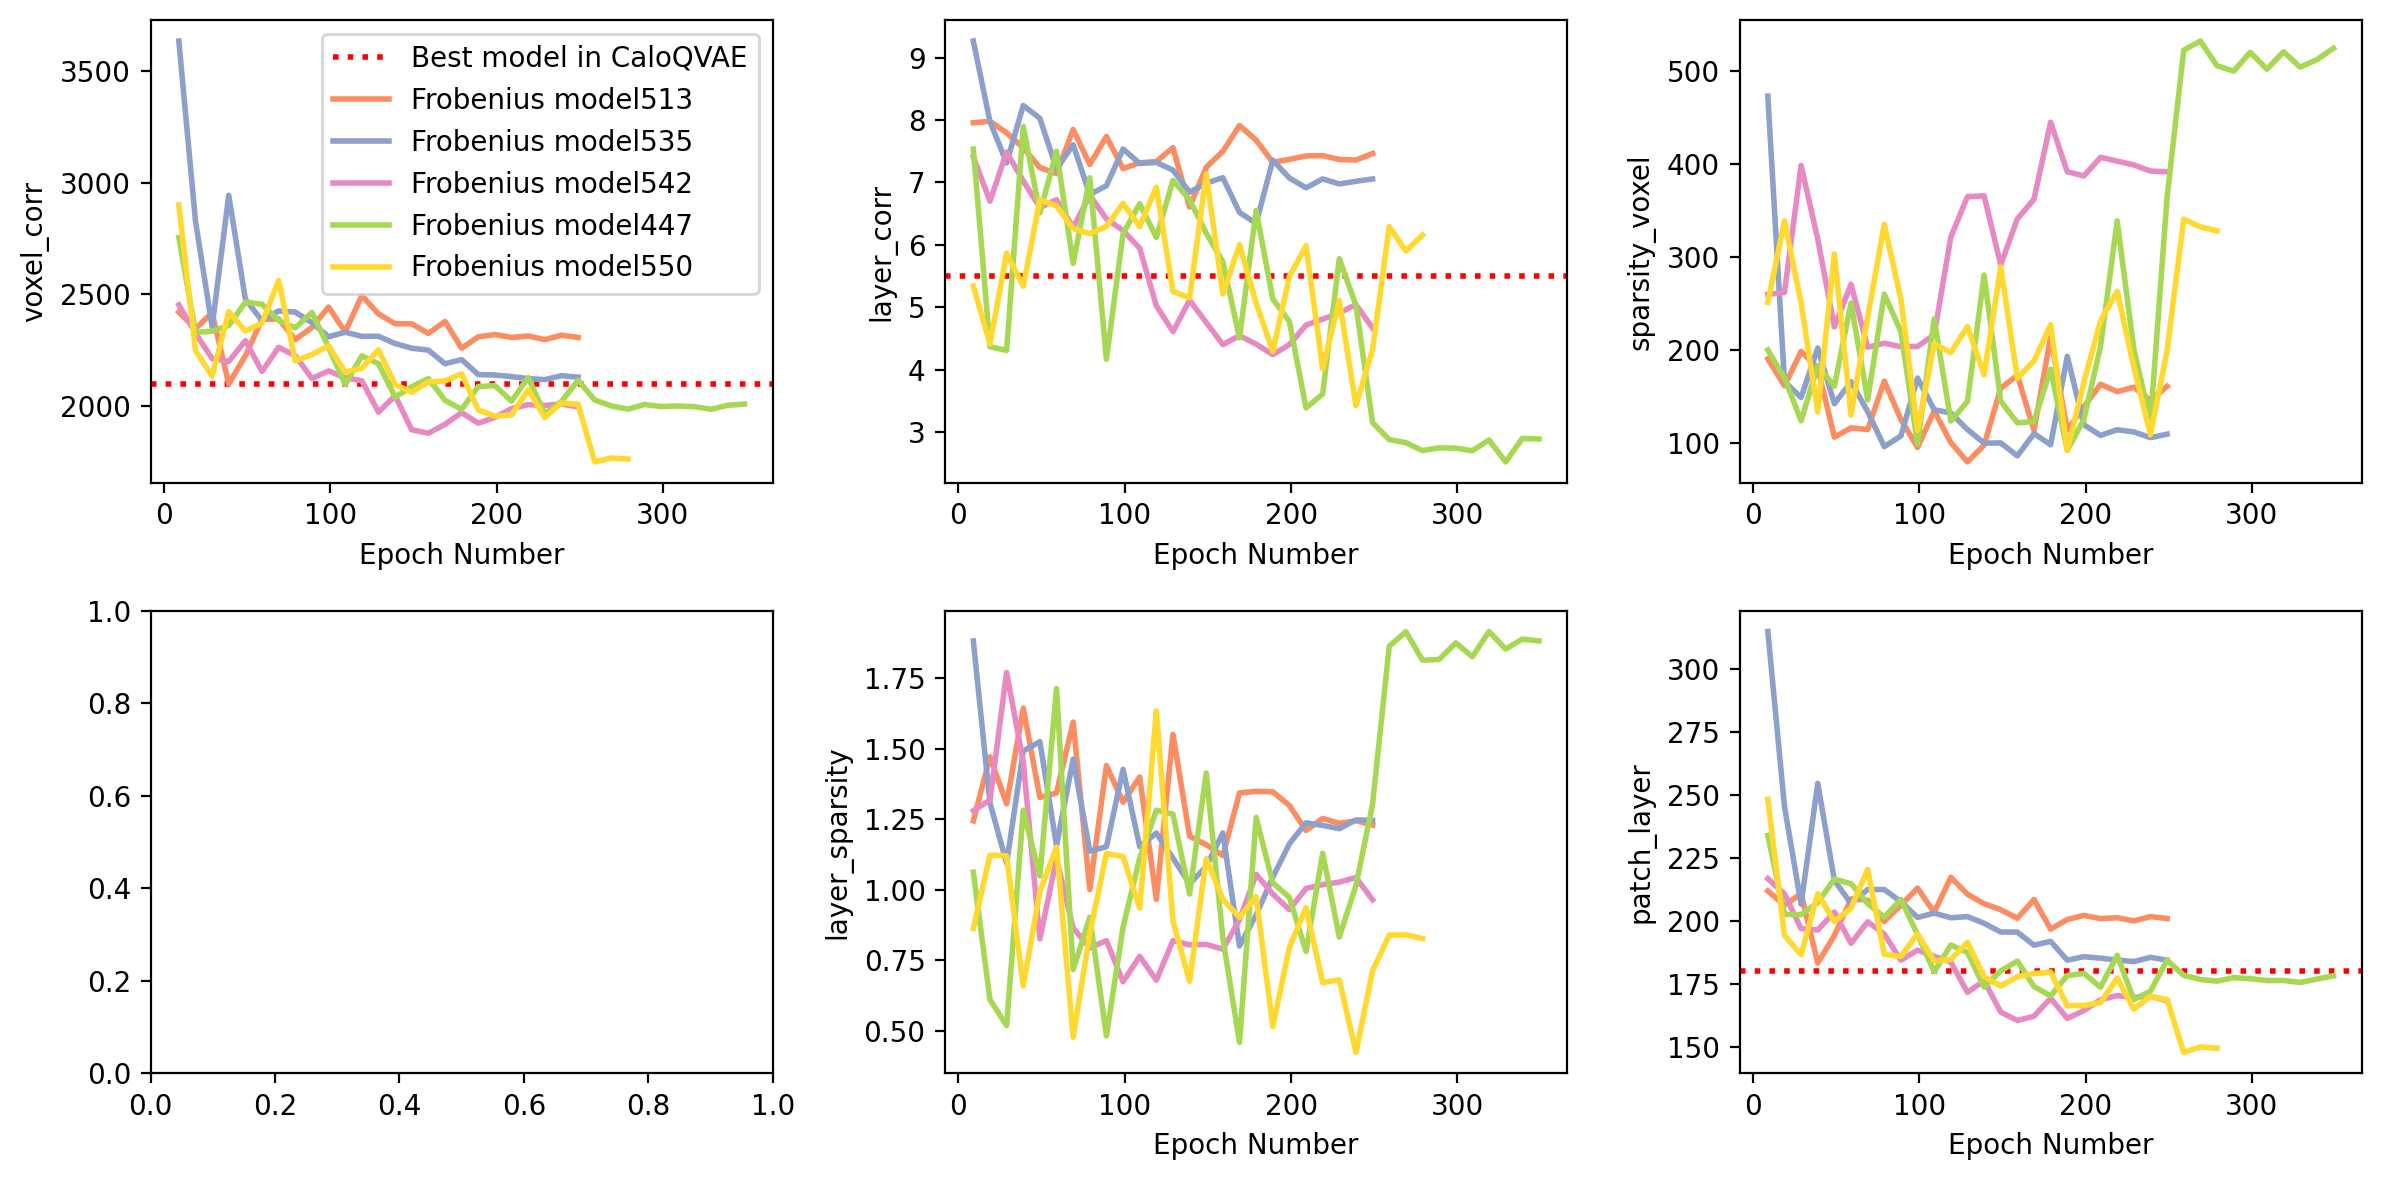

In [20]:

model447_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250825_185123-cysb33l7/files/Frobenius_All.npz", allow_pickle=True)
model550_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250825_231749-qtzezvdq/files/Frobenius_All.npz", allow_pickle=True)
model542_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250821_230537-pp65hpwu/files/Frobenius_All.npz", allow_pickle=True)
model535_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250819_203111-u88m8d6w/files/Frobenius_All.npz", allow_pickle=True)
model513_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250813_233227-z4hoj71e/files/Frobenius_All.npz", allow_pickle=True)

models = {'modelBest': [],  'model513': model513_F, 'model535': model535_F, 'model542': model542_F, 'model447': model447_F, 'model550': model550_F}

# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

bm = {"voxel_corr": 2100, "layer_corr": 5.5, "patch_layer" : 180}
l = []
for key in model513_F.keys():
    if key != 'epochs':
        l.append(key)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
for j, key in enumerate(l):
    ax1 = ax.flatten()[j]
    if key in bm.keys():
        ax1.axhline(bm[key], color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')

    for i, (name, model) in enumerate(models.items()):
        color = model_colors[name]
        if name != 'modelBest':
            # if name == 'model513':
            frobenius = model[key]
            # else:
                # frobenius = model['frobenius']
            epochs = model['epochs']
            try:
                ax1.plot(epochs, frobenius, linewidth=2, label=f'Frobenius {name}', color=color)
                ax1.set_xlabel('Epoch Number')
                ax1.set_ylabel(f'{key}')
                if j ==0:
                    ax1.legend()
            except Exception as e:
                print(f"Error plotting {key} for {name}: {e}")

plt.tight_layout()

In [ ]:
###################Old models

In [6]:
model513 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250813_233227-z4hoj71e/files/JetData.npz")
model490 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250731_021832-ap3mcnoa/files/JetData.npz")
model488 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250729_183141-apto0bfc/files/JetData.npz")
model485 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250728_193726-6pcdc31g/files/JetData.npz")
model475 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250725_015032-q9cfxrvb/files/JetData.npz")
model468 = np.load("/home/jtoledo/CaloQuVAE/outputs_sym/run-20250723_201652-993qhoh4/files/JetData.npz")
model454 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250721_152921-c22o2vxp/files/JetData.npz")
model453 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250720_233628-4hns88vo/files/JetData.npz")
model448 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250718_004118-9vdkr3bn/files/JetData.npz")
model400 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250712_153312-7p5kb9zm/files/JetData.npz")
modelBest = np.load("/home/jtoledo/JetData.npz")

models = {'model448': model448, 'model400': model400, 'modelBest': modelBest, 
    'model453': model453, 'model454': model454, 'model475': model475, 'model468': model468}
models = { 'modelBest': modelBest, 'model453': model453, 'model454': model454, 
          'model475': model475, 'model468': model468, 'model485': model485, 'model488': model488, 'model490': model490, 'model513': model513}

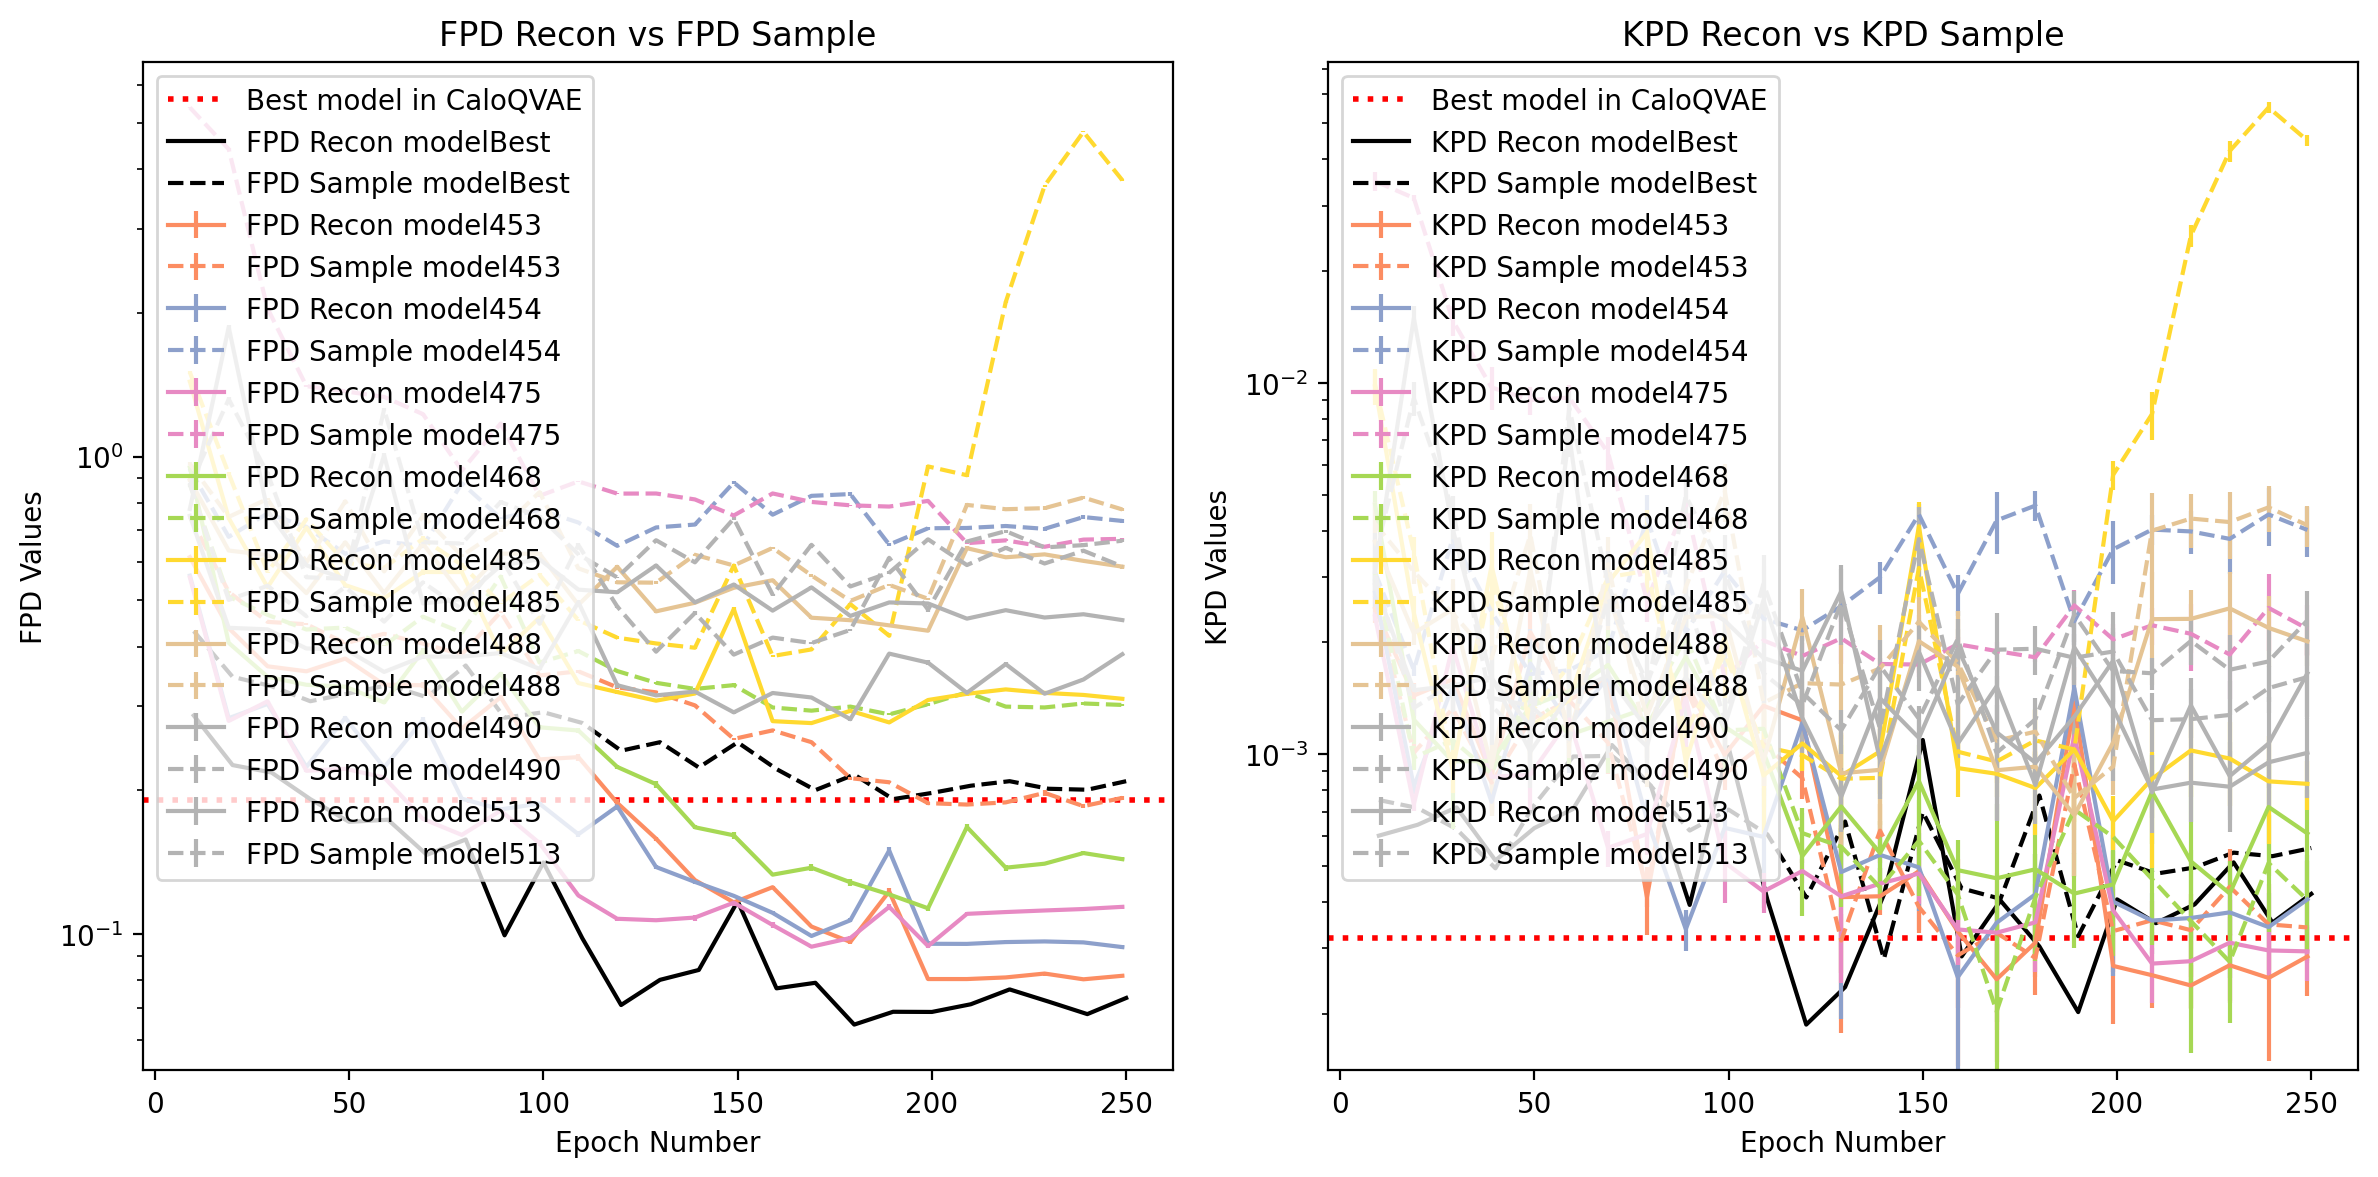

In [8]:
# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.axhline(0.191, color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')
ax2.axhline(0.00032, color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')
for name, model in models.items():
    color = model_colors[name]
    if name != 'modelBest':
        en_list = model['array1']
        fpd_recon = model['array2']
        fpd_recon_err = model['array3']
        kpd_recon = model['array4']
        kpd_recon_err = model['array5']
        fpd_sample = model['array6']
        fpd_sample_err = model['array7']
        kpd_sample = model['array8']
        kpd_sample_err = model['array9']
        # Plot fpd_recon and fpd_sample on ax1
        ax1.errorbar(en_list, fpd_recon, yerr=fpd_recon_err, label=f'FPD Recon {name}', color=color)
        ax1.errorbar(en_list, fpd_sample, yerr=fpd_sample_err, label=f'FPD Sample {name}', linestyle='--', color=color)
        ax1.set_xlabel('Epoch Number')
        ax1.set_ylabel('FPD Values')
        ax1.set_title('FPD Recon vs FPD Sample')
        ax1.set_yscale('log')

        # Plot kpd_recon and kpd_sample on ax2
        ax2.errorbar(en_list, kpd_recon, yerr=kpd_recon_err, label=f'KPD Recon {name}', color=color)
        ax2.errorbar(en_list, kpd_sample, yerr=kpd_sample_err, label=f'KPD Sample {name}', linestyle='--', color=color)
        ax2.set_xlabel('Epoch Number')
        ax2.set_ylabel('KPD Values')
        ax2.set_title('KPD Recon vs KPD Sample')
        
    else:
        en_list = model['array1']
        fpd_recon = model['array2']
        # fpd_recon_err = model['array3']
        kpd_recon = model['array3']
        # kpd_recon_err = model['array5']
        fpd_sample = model['array4']
        # fpd_sample_err = model['array7']
        kpd_sample = model['array5']
        # kpd_sample_err = model['array9']
        ax1.plot(en_list, fpd_recon, label=f'FPD Recon {name}', color='black')
        ax1.plot(en_list, fpd_sample, label=f'FPD Sample {name}', linestyle='--', color='black')
        ax2.plot(en_list, kpd_recon, label=f'KPD Recon {name}', color='black')
        ax2.plot(en_list, kpd_sample, label=f'KPD Sample {name}', linestyle='--', color='black')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    ax1.set_yscale('log')
    ax2.set_yscale('log')

    

plt.tight_layout()

In [13]:
model513_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250813_233227-z4hoj71e/files/Frobenius_All.npz", allow_pickle=True)

In [14]:
for key in model513_F.keys():
    print(f"{key}: {model513_F[key].shape}")

epochs: (25,)
voxel_corr: (25,)
layer_corr: (25,)
sparsity_voxel: (25,)
sparsity_layer: (25,)
layer_sparsity: (25,)
patch_layer: (25,)


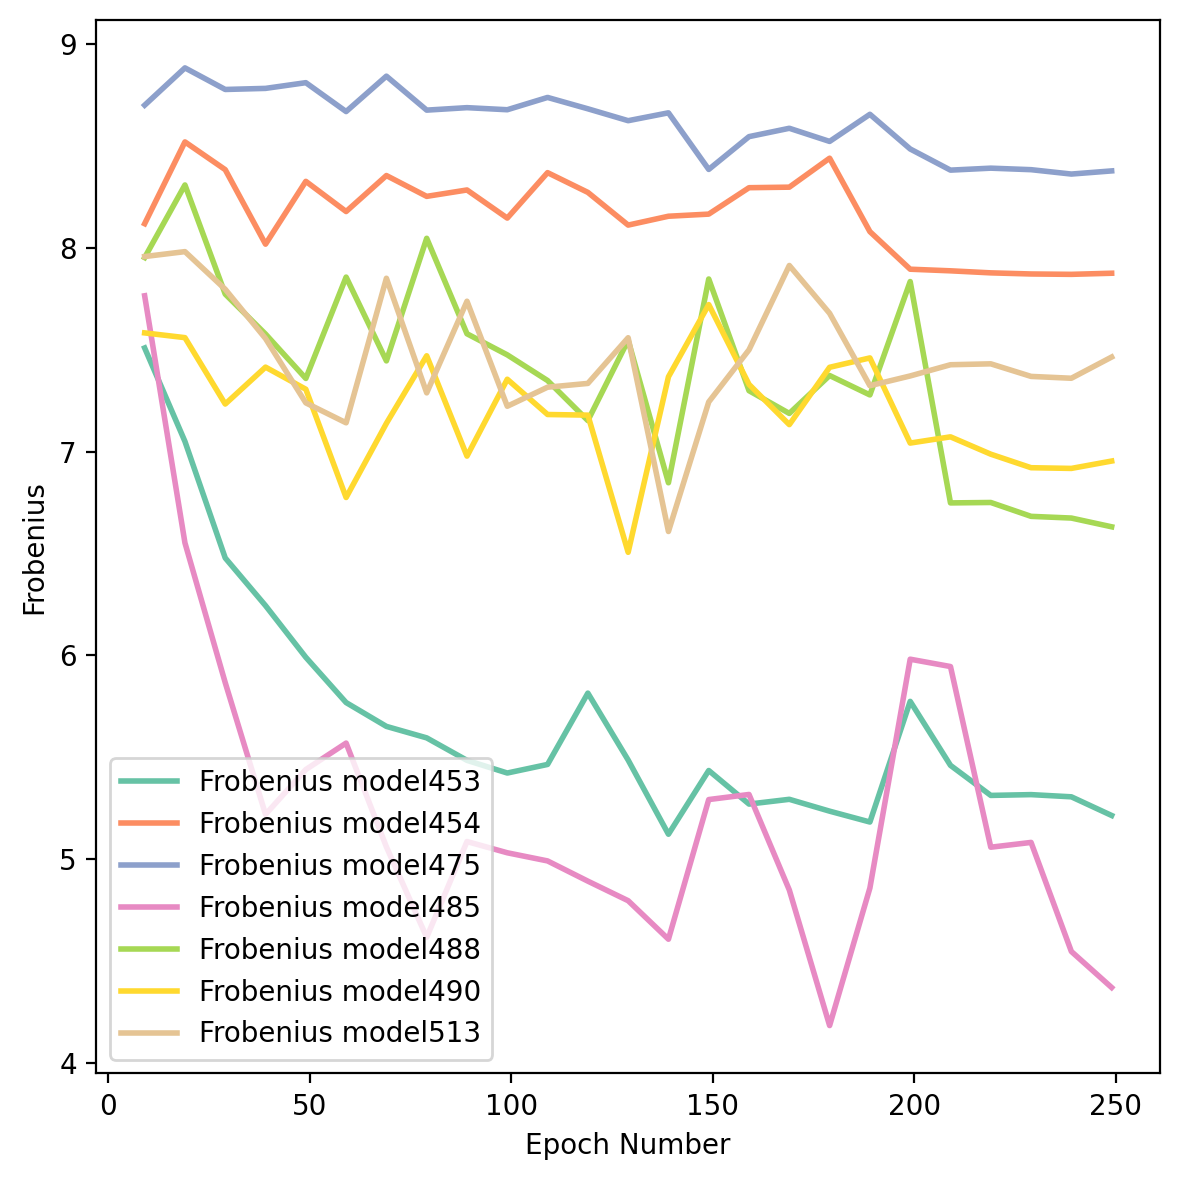

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

model513_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250813_233227-z4hoj71e/files/Frobenius_All.npz")
model490_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250731_021832-ap3mcnoa/files/layer_corr_FrobeniusScores.npz")
model488_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250729_183141-apto0bfc/files/layer_corr_FrobeniusScores.npz")
model485_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250728_193726-6pcdc31g/files/layer_corr_FrobeniusScores.npz")
model475_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250725_015032-q9cfxrvb/files/layer_corr_FrobeniusScores.npz")
# model468_F = np.load("/home/jtoledo/CaloQuVAE/outputs_sym/run-20250723_201652-993qhoh4/files/layer_corr_FrobeniusScores.npz")
model454_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250721_152921-c22o2vxp/files/layer_corr_FrobeniusScores.npz")
model453_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250720_233628-4hns88vo/files/layer_corr_FrobeniusScores.npz")
# model448_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250718_004118-9vdkr3bn/files/layer_corr_FrobeniusScores.npz")
# model400_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250712_153312-7p5kb9zm/files/layer_corr_FrobeniusScores.npz")


models = {  'model453': model453_F, 'model454': model454_F, 'model475': model475_F, 'model485': model485_F, 'model488': model488_F, 'model490': model490_F, 'model513': model513_F}

# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

# for ax1 in ax.flatten():
ax1 = ax

for i, (name, model) in enumerate(models.items()):
    color = model_colors[name]
    if name == 'model513':
        frobenius = model['layer_corr']
    else:
        frobenius = model['frobenius']
    epochs = model['epochs']

    ax1.plot(epochs, frobenius, linewidth=2, label=f'Frobenius {name}', color=color)
    ax1.set_xlabel('Epoch Number')
    ax1.set_ylabel('Frobenius')
    # ax1.set_yscale('log')
    ax1.legend()

plt.tight_layout()

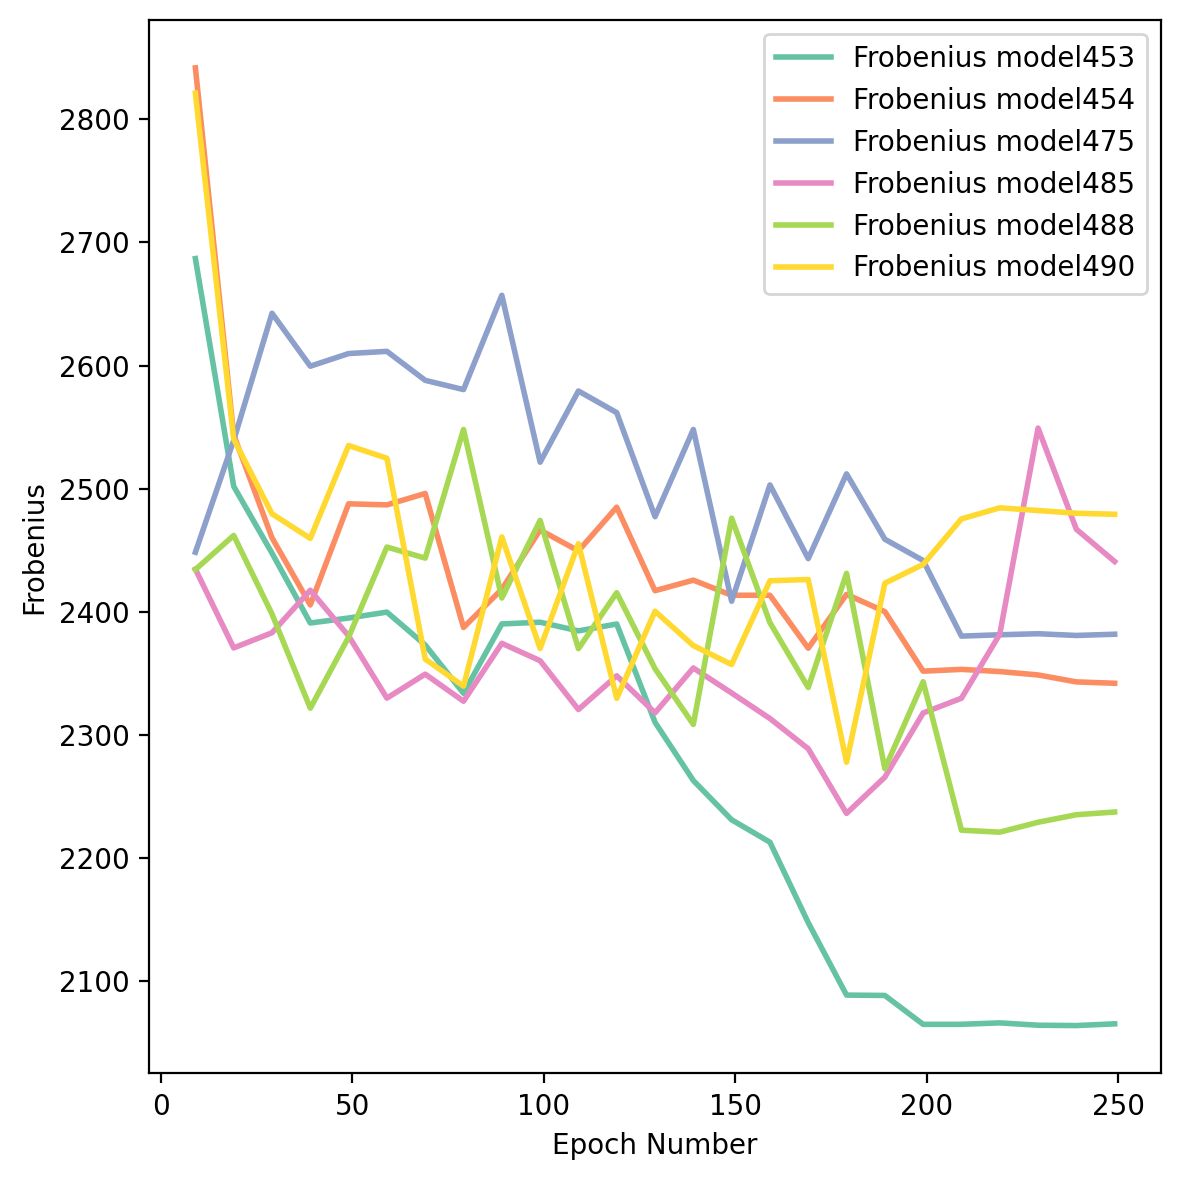

In [72]:
model490_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250731_021832-ap3mcnoa/files/voxel_corr_FrobeniusScores.npz")
model488_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250729_183141-apto0bfc/files/voxel_corr_FrobeniusScores.npz")
model485_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250728_193726-6pcdc31g/files/voxel_corr_FrobeniusScores.npz")
model453_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250720_233628-4hns88vo/files/voxel_corr_FrobeniusScores.npz")
model454_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250721_152921-c22o2vxp/files/voxel_corr_FrobeniusScores.npz")
model475_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250725_015032-q9cfxrvb/files/voxel_corr_FrobeniusScores.npz")

models = {  'model453': model453_F, 'model454': model454_F, 'model475': model475_F, 'model485': model485_F, 'model488': model488_F, 'model490': model490_F}

# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
for name, model in models.items():
    color = model_colors[name]

    epochs = model['epochs']
    frobenius = model['frobenius']
    
    ax1.plot(epochs, frobenius, linewidth=2, label=f'Frobenius {name}', color=color)
    ax1.set_xlabel('Epoch Number')
    ax1.set_ylabel('Frobenius')
    # ax1.set_yscale('log')
    ax1.legend()

plt.tight_layout()

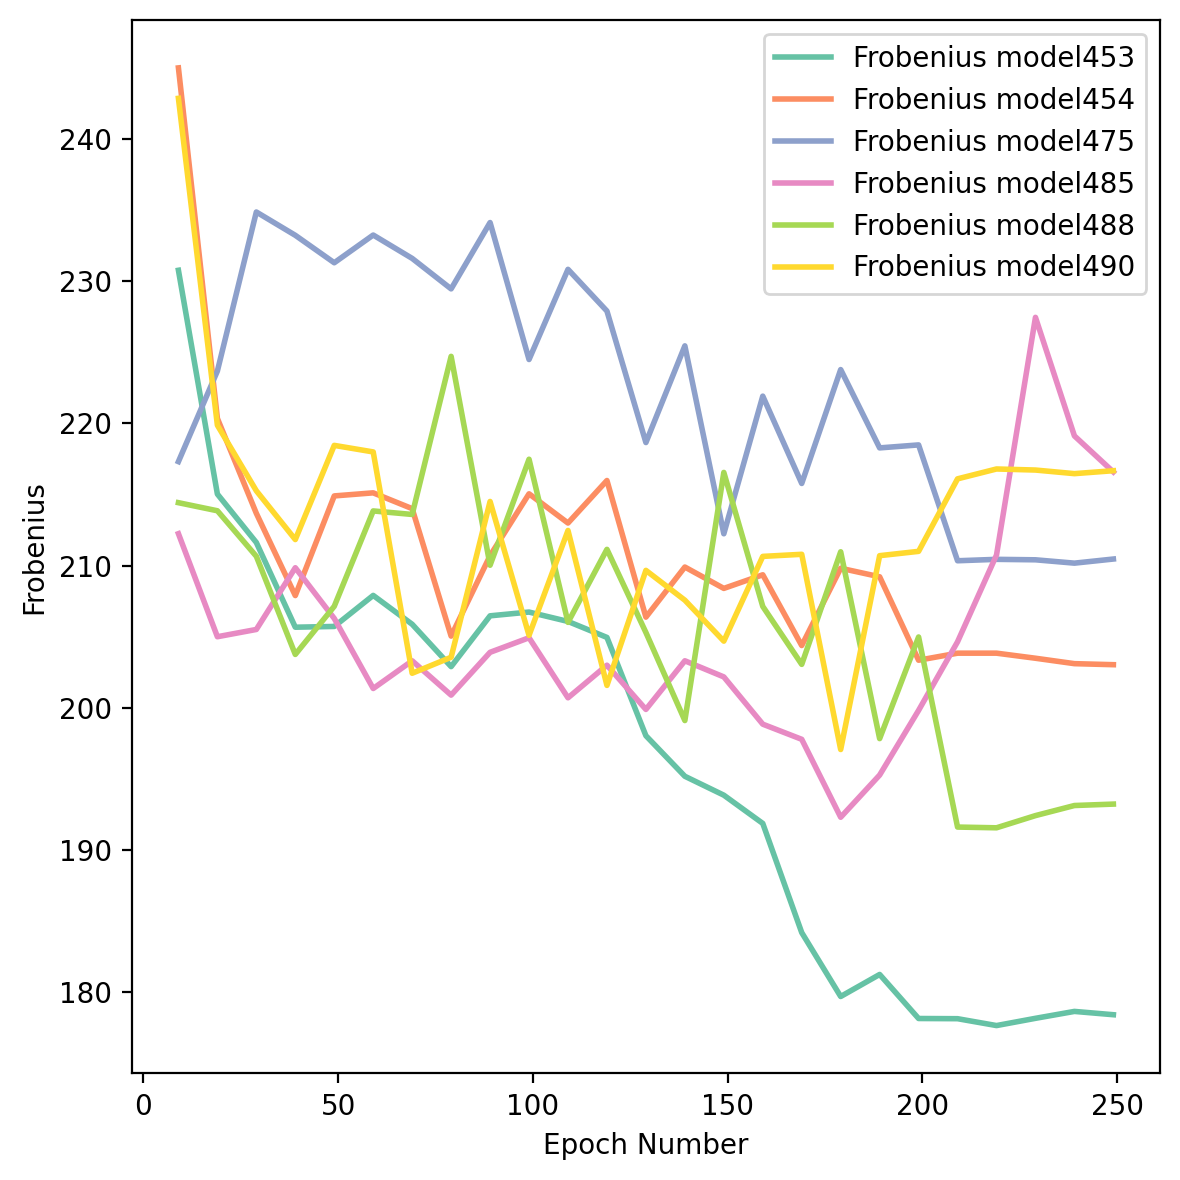

In [73]:
model490_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250731_021832-ap3mcnoa/files/patch_layer_FrobeniusScores.npz")
model488_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250729_183141-apto0bfc/files/patch_layer_FrobeniusScores.npz")
model485_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250728_193726-6pcdc31g/files/patch_layer_FrobeniusScores.npz")
model453_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250720_233628-4hns88vo/files/patch_layer_FrobeniusScores.npz")
model454_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250721_152921-c22o2vxp/files/patch_layer_FrobeniusScores.npz")
model475_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250725_015032-q9cfxrvb/files/patch_layer_FrobeniusScores.npz")


models = {  'model453': model453_F, 'model454': model454_F, 'model475': model475_F, 'model485': model485_F, 'model488': model488_F, 'model490': model490_F}


# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
for name, model in models.items():
    color = model_colors[name]

    epochs = model['epochs']
    frobenius = model['frobenius']
    
    ax1.plot(epochs, frobenius, linewidth=2, label=f'Frobenius {name}', color=color)
    ax1.set_xlabel('Epoch Number')
    ax1.set_ylabel('Frobenius')
    # ax1.set_yscale('log')
    ax1.legend()

plt.tight_layout()

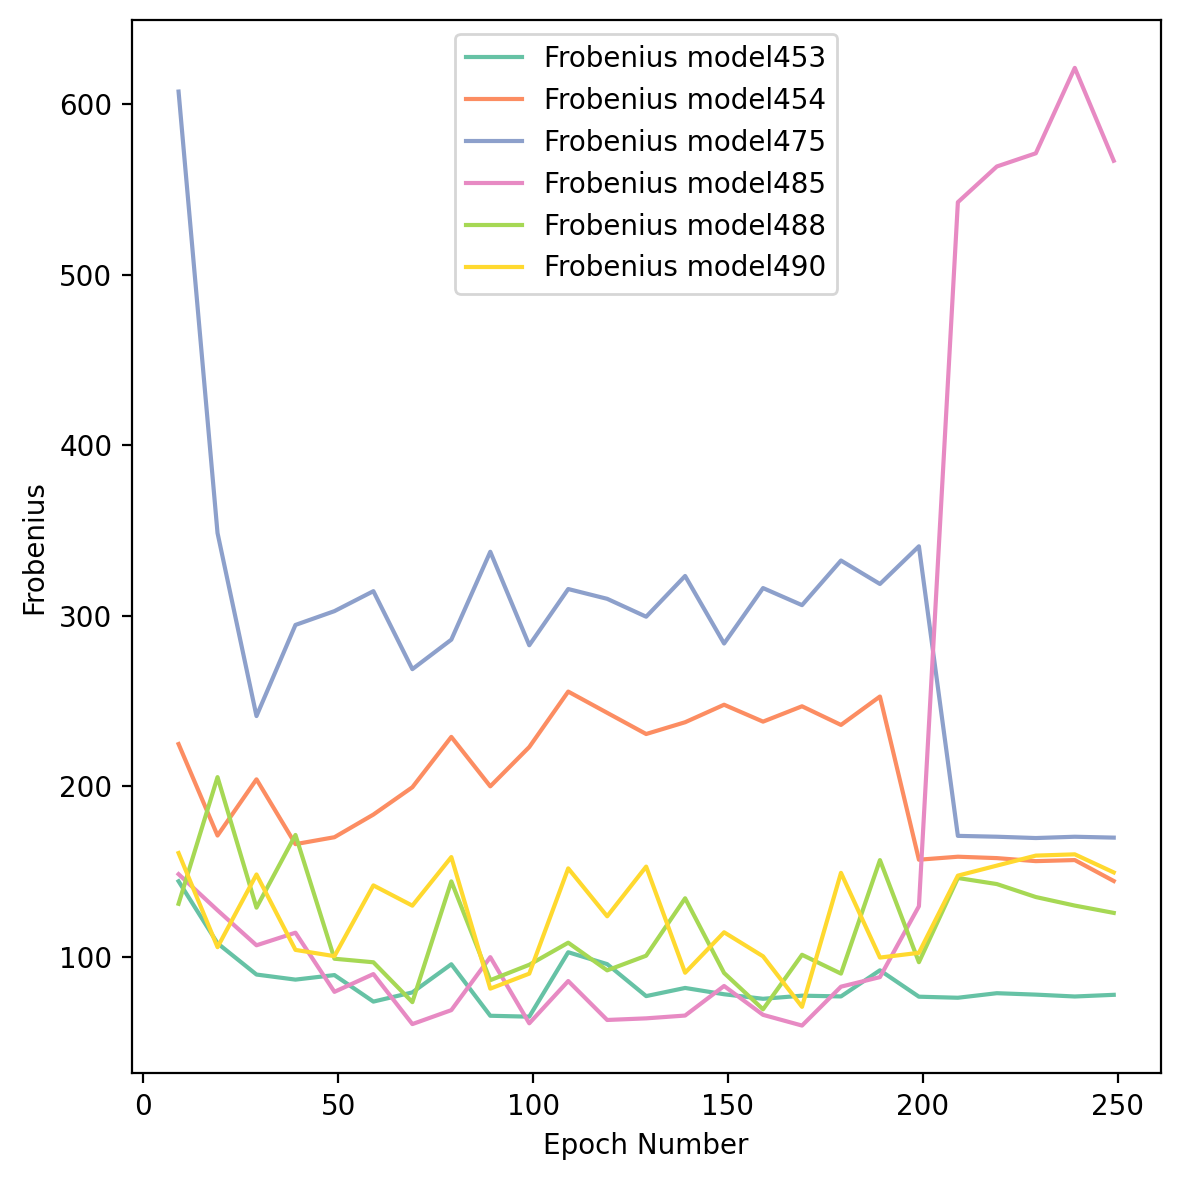

In [76]:
model490_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250731_021832-ap3mcnoa/files/sparsity_voxel_FrobeniusScores.npz", allow_pickle=True)
model488_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250729_183141-apto0bfc/files/sparsity_voxel_FrobeniusScores.npz", allow_pickle=True)
model485_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250728_193726-6pcdc31g/files/sparsity_voxel_FrobeniusScores.npz", allow_pickle=True)
model453_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250720_233628-4hns88vo/files/sparsity_voxel_FrobeniusScores.npz", allow_pickle=True)
model454_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250721_152921-c22o2vxp/files/sparsity_voxel_FrobeniusScores.npz", allow_pickle=True)
model475_F = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250725_015032-q9cfxrvb/files/sparsity_voxel_FrobeniusScores.npz", allow_pickle=True)

models = {  'model453': model453_F, 'model454': model454_F, 'model475': model475_F, 'model485': model485_F, 'model488': model488_F, 'model490': model490_F }


# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
for name, model in models.items():
    color = model_colors[name]

    epochs = model['epochs']
    frobenius = model['frobenius']
    
    ax1.plot(epochs, frobenius, label=f'Frobenius {name}', color=color)
    ax1.set_xlabel('Epoch Number')
    ax1.set_ylabel('Frobenius')
    # ax1.set_yscale('log')
    ax1.legend()

plt.tight_layout()